<a href="https://colab.research.google.com/github/domshog/Time-series-Weather-Forecasting-/blob/main/ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time series: Sanaa Weather Forecasting

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import os
# print(os.listdir("../input"))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_norm3.csv to data_norm3 (1).csv


# **ARIMA**

In [ ]:
df = pd.read_csv('data_norm3.csv', parse_dates=['date'])
df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation
0,2011-01-01,0.055,0.089,0.276,0.271,0.920,0.151
1,2011-01-02,0.063,0.018,0.441,0.263,0.921,0.148
2,2011-01-03,0.000,0.112,0.388,0.251,0.992,0.091
3,2011-01-04,0.000,0.110,0.300,0.791,0.964,0.068
4,2011-01-05,0.000,0.089,0.312,0.612,0.948,0.052


In [ ]:
df.describe()

,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.458767,0.449817,0.405367,0.492877,0.676538,0.513382
std,0.345099,0.257798,0.119389,0.314365,0.149152,0.265841
min,0.000000,-0.212000,0.141000,0.003000,0.304000,0.000000
25%,0.063000,0.237000,0.329000,0.263000,0.560000,0.288000
50%,0.520000,0.462000,0.394000,0.578000,0.676000,0.507000
75%,0.772000,0.673000,0.471000,0.768000,0.791000,0.749163
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws'], axis=1)
df.head()

,date,solar_radiation
0,2011-01-01,0.151
1,2011-01-02,0.148
2,2011-01-03,0.091
3,2011-01-04,0.068
4,2011-01-05,0.052


In [ ]:
monthly_df = df.resample('M', on='date').mean()
monthly_df.head()

,solar_radiation
date,
2011-01-31,0.187387
2011-02-28,0.320179
2011-03-31,0.444645
2011-04-30,0.498733
2011-05-31,0.632129


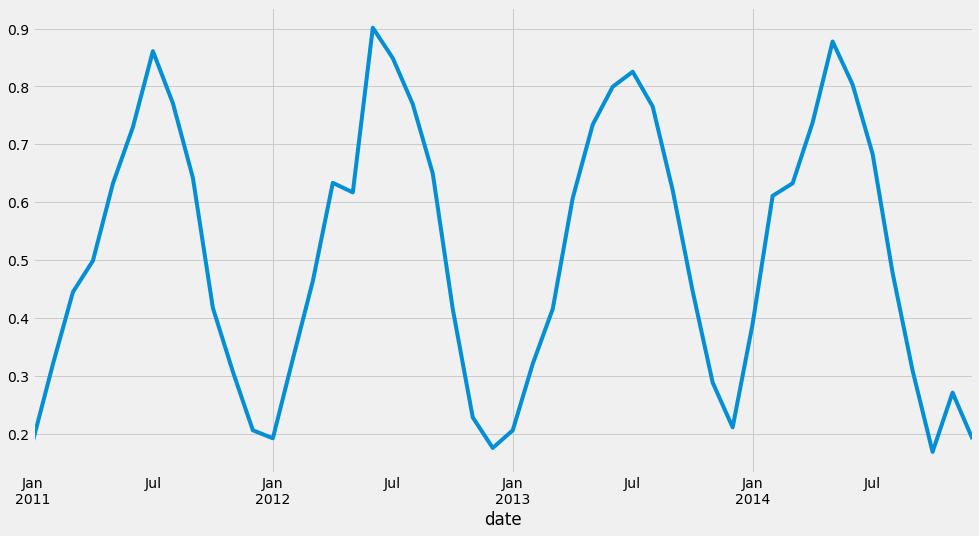

In [ ]:
monthly_df['solar_radiation'].plot(figsize=(15, 8))

### Autocorrelation Plot
Trend is Polynomial.
D =2

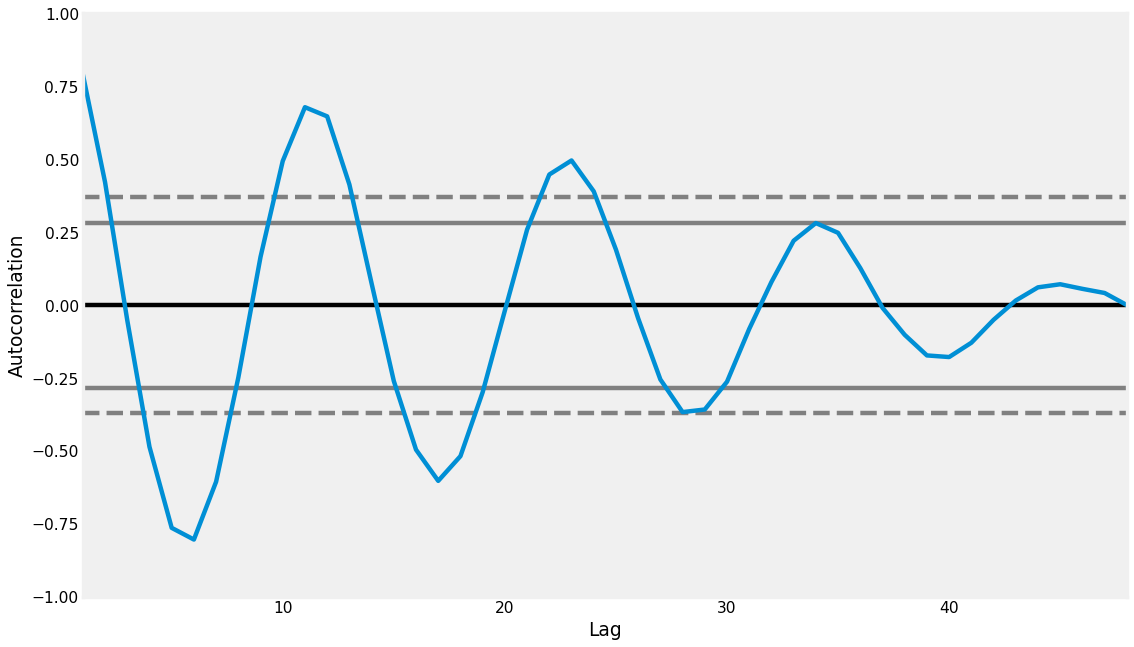

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
autocorrelation_plot(monthly_df['solar_radiation'])

# q = 2

### Partial Autocorrelation Graph

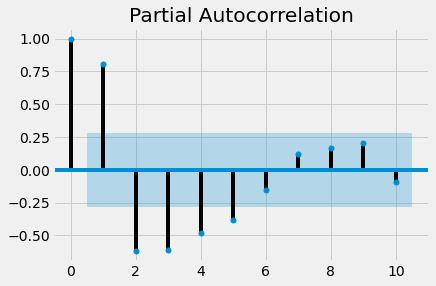

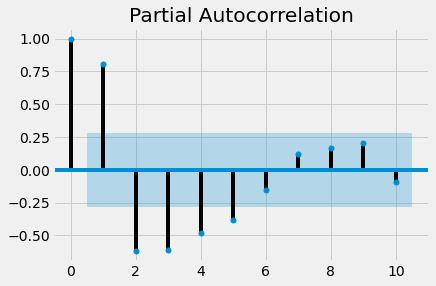

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(monthly_df['solar_radiation'], lags=10)

p = 1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(monthly_df['solar_radiation'], order=(5,2,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D2.solar_radiation   No. Observations:                   46
Model:                 ARIMA(5, 2, 1)   Log Likelihood                  43.140
Method:                       css-mle   S.D. of innovations              0.089
Date:                Thu, 10 Dec 2020   AIC                            -70.279
Time:                        21:24:46   BIC                            -55.650
Sample:                    03-31-2011   HQIC                           -64.799
                         - 12-31-2014                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0009      0.001     -0.920      0.363      -0.003       0.001
ar.L1.D2.solar_radiation     0.2676      0.140      1.910      0.064      -0.007       0.542
ar.L2.D2.solar_radiation     0.2137      0.146      1.469      0.150      -0.071       0.499
ar.L3.D2.solar_radiation    -0.0383      0.148     -0.259      0.797      -0.328       0.252
ar.L4.D2.solar_radiation    -0.1669      0.146     -1.143      0.260      -0.453       0.119
ar.L5.D2.solar_radiation    -0.4072      0.143     -2.851      0.007      -0.687      -0.127
ma.L1.D2.solar_radiation    -1.0000      0.063    -15.948      0.000      -1.123      -0.877
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8936           -0.5693j            1.0595           -0.0903
AR.2            0.8936           +0.5693j            1.0595            0.0903
AR.3           -1.2713           -0.0000j            1.2713           -0.5000
AR.4           -0.4628           -1.2275j            1.3119           -0.3074
AR.5           -0.4628           +1.2275j            1.3119            0.3074
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
residuals = model_fit.resid

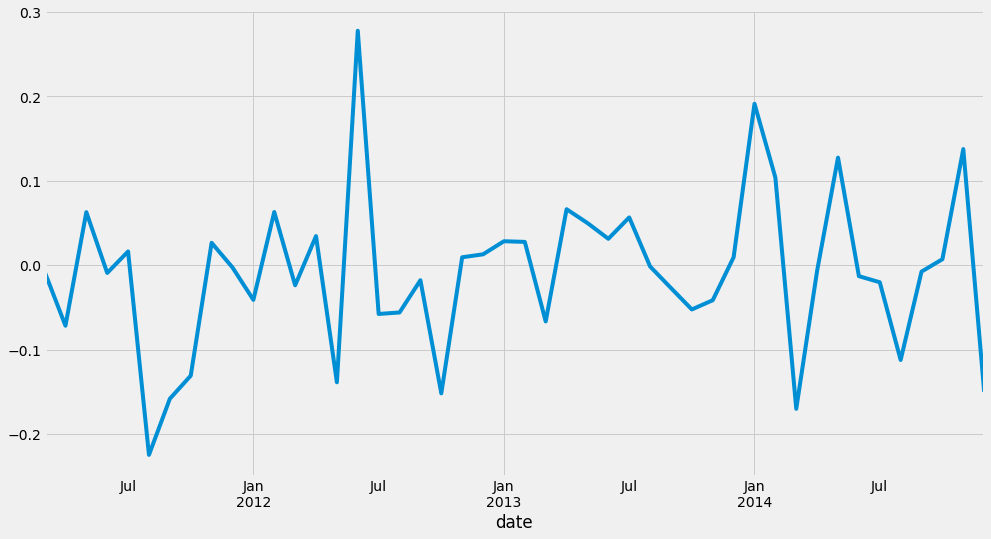

In [ ]:
residuals.plot(figsize=(15, 8))

In [ ]:
residuals.describe()

count    46.000000
mean     -0.009034
std       0.094566
min      -0.224567
25%      -0.054993
50%      -0.006903
75%       0.030667
max       0.277804
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(p,d,q)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [ ]:
output = model_fit.forecast()
output

(array([0.28990117]), array([0.08872825]), array([[0.11599699, 0.46380536]]))

In [ ]:
model_fit.forecast(5)[0]

array([0.28990117, 0.36827154, 0.43336253, 0.41403584, 0.4135161 ])

## Walkforward 

In [ ]:
train_size = int(monthly_df.shape[0]*0.7)

In [ ]:
train, test = monthly_df.solar_radiation[0:train_size], monthly_df.solar_radiation[train_size:]

In [ ]:
test.shape

(15,)

In [ ]:
data = train
predict_ARIMA =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict_ARIMA.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

0.5085538805577153
0.32513491316525106
0.19767416521436454
0.20317871656169878
0.5279089890538121
0.8571926185512384
0.7646257523013712
0.7516504586700993
0.8305638594418534
0.71473711174795
0.6200383151122331
0.32797905432102903
0.18215688069681202
0.15268799088565646
0.37872079849466733


In [ ]:
pip install ml_metrics


In [ ]:
predict_ARIMA

[0.5085538805577153,
 0.32513491316525106,
 0.19767416521436454,
 0.20317871656169878,
 0.5279089890538121,
 0.8571926185512384,
 0.7646257523013712,
 0.7516504586700993,
 0.8305638594418534,
 0.71473711174795,
 0.6200383151122331,
 0.32797905432102903,
 0.18215688069681202,
 0.15268799088565646,
 0.37872079849466733]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import ml_metrics as metrics
from ml_metrics import rmse

In [ ]:
mean_squared_error(test.values, predict_ARIMA), rmse(test.values, predict_ARIMA), mean_absolute_error(test.values, predict_ARIMA)

(0.012402977822234205, 0.1113686572705005, 0.08663973557834845)

In [ ]:
MBE = np.mean(predict_ARIMA - test.values)
MBE

0.016402678534599573

In [ ]:
from sklearn.metrics import r2_score
r2_score(test.values, predict_ARIMA)

0.7621584239874641

In [ ]:
from scipy import stats
stats.ttest_ind(test.values, predict_ARIMA, equal_var = False)

Ttest_indResult(statistic=-0.1829420346831389, pvalue=0.8561687786575285)

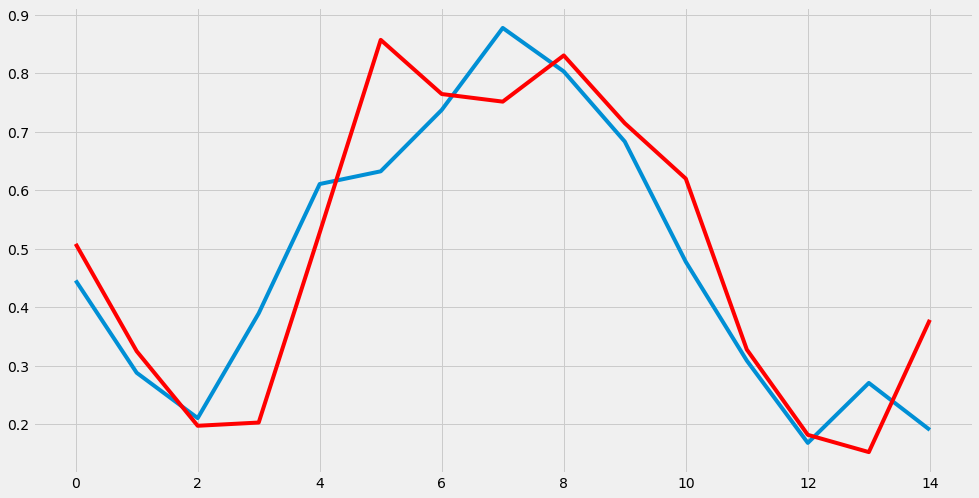

In [ ]:
from matplotlib import pyplot
plt.figure(figsize=(15,8))
pyplot.plot(test.values)
pyplot.plot(predict_ARIMA, color='red')


In [ ]:
pip install TSErrors

In [ ]:
import numpy as np
from TSErrors import FindErrors

er = FindErrors(test.values, predict_ARIMA)
er.relative_rmse()   # calculate Nash Sutcliff efficiency

0.23539320421735752

#**SARIMA**

SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_csv('data_norm3.csv', parse_dates=['date'])
df.head()

,date,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation
0,2011-01-01,0.055,0.089,0.276,0.271,0.920,0.151
1,2011-01-02,0.063,0.018,0.441,0.263,0.921,0.148
2,2011-01-03,0.000,0.112,0.388,0.251,0.992,0.091
3,2011-01-04,0.000,0.110,0.300,0.791,0.964,0.068
4,2011-01-05,0.000,0.089,0.312,0.612,0.948,0.052


In [ ]:
df.describe()

,SR_time,max_temp,max_Ws,direction,DA_Humidity,solar_radiation
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.458767,0.449817,0.405367,0.492877,0.676538,0.513382
std,0.345099,0.257798,0.119389,0.314365,0.149152,0.265841
min,0.000000,-0.212000,0.141000,0.003000,0.304000,0.000000
25%,0.063000,0.237000,0.329000,0.263000,0.560000,0.288000
50%,0.520000,0.462000,0.394000,0.578000,0.676000,0.507000
75%,0.772000,0.673000,0.471000,0.768000,0.791000,0.749163
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.drop(['SR_time', 'max_temp', 'direction', 'DA_Humidity','max_Ws'], axis=1)
df.head()

,date,solar_radiation
0,2011-01-01,0.151
1,2011-01-02,0.148
2,2011-01-03,0.091
3,2011-01-04,0.068
4,2011-01-05,0.052


In [ ]:
monthly_df = df.resample('M', on='date').mean()
monthly_df.head()
monthly_df.shape

(48, 1)

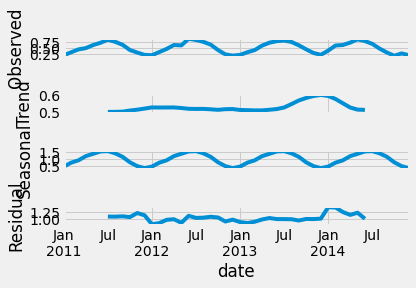

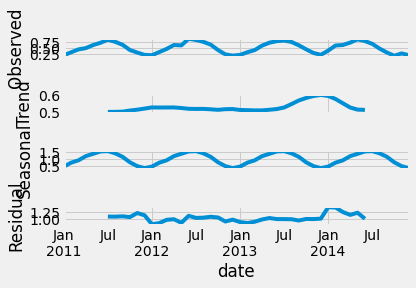

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(monthly_df['solar_radiation'], model='multiplicative')
result_a.plot()

In [ ]:
model = SARIMAX(monthly_df['solar_radiation'], order=(5,2,1), seasonal_order=(1,0,0,12))

In [ ]:
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


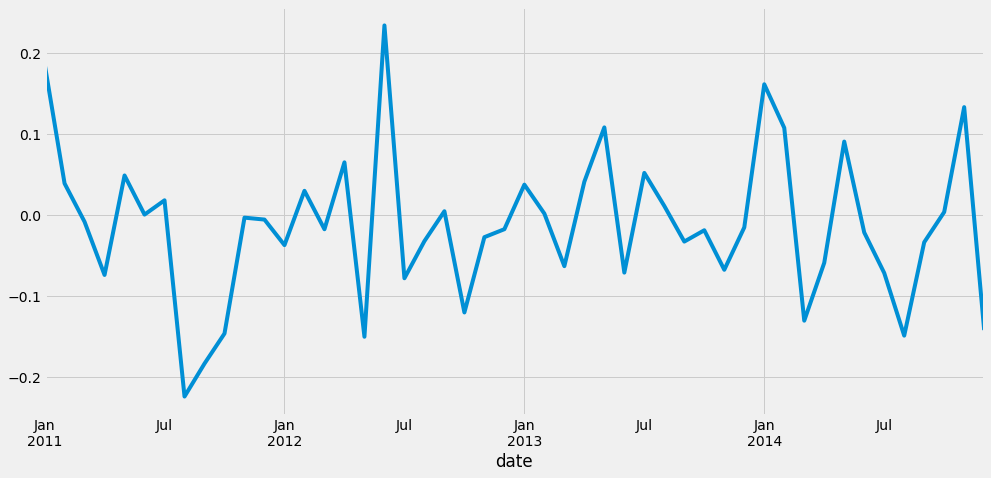

In [ ]:
residuals = model_fit.resid
residuals.plot(figsize=(15,7))

In [ ]:
output = model_fit.forecast()
output

2015-01-31    0.390047
Freq: M, dtype: float64

In [ ]:
model_fit.forecast(12)

2015-01-31    0.390047
2015-02-28    0.542022
2015-03-31    0.588634
2015-04-30    0.587400
2015-05-31    0.645877
2015-06-30    0.541359
2015-07-31    0.451596
2015-08-31    0.339041
2015-09-30    0.276554
2015-10-31    0.225972
2015-11-30    0.307853
2015-12-31    0.304992
Freq: M, dtype: float64

In [ ]:
yhat = model_fit.predict()
yhat.head()

date
2011-01-31    0.000000
2011-02-28    0.281081
2011-03-31    0.452970
2011-04-30    0.572798
2011-05-31    0.583165
Freq: M, dtype: float64

In [ ]:
from matplotlib import pyplot

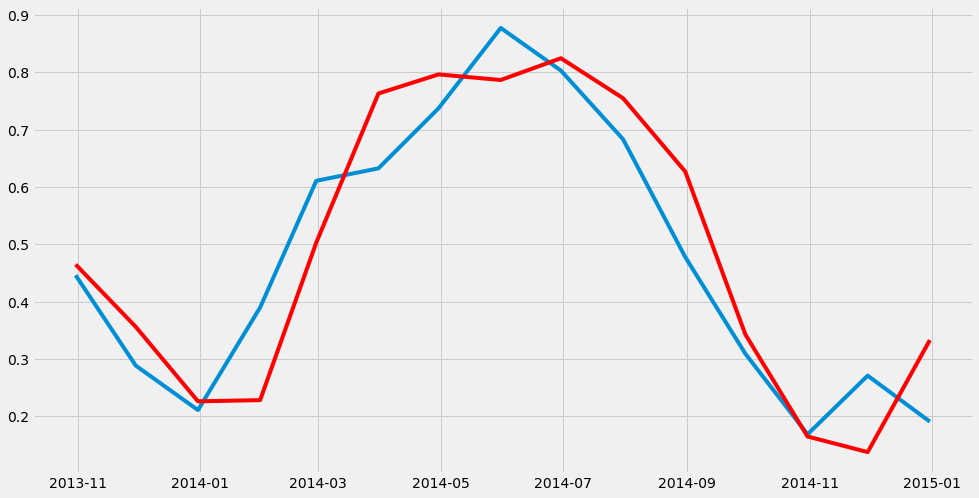

In [ ]:
plt.figure(figsize=(15,8))
pyplot.plot(monthly_df['solar_radiation'][33:])
pyplot.plot(yhat[33:], color='red')


In [ ]:
yhat[33:]

date
2013-10-31    0.464829
2013-11-30    0.355931
2013-12-31    0.226043
2014-01-31    0.228097
2014-02-28    0.503024
2014-03-31    0.763196
2014-04-30    0.796495
2014-05-31    0.786737
2014-06-30    0.824735
2014-07-31    0.755007
2014-08-31    0.627015
2014-09-30    0.342723
2014-10-31    0.164664
2014-11-30    0.137427
2014-12-31    0.332819
Freq: M, dtype: float64

In [ ]:
mean_squared_error(monthly_df['solar_radiation'], yhat), rmse(monthly_df['solar_radiation'], yhat), mean_absolute_error(monthly_df['solar_radiation'], yhat)

(0.008840217941146753, 0.09402243318031475, 0.07045601922289198)

In [ ]:
MBE = np.mean(yhat - monthly_df['solar_radiation'])
MBE

0.013016860637667993

In [ ]:
from sklearn.metrics import r2_score
r2_score(monthly_df['solar_radiation'], yhat)

0.8327055565984173

In [ ]:
from scipy import stats
stats.ttest_ind(monthly_df['solar_radiation'], yhat, equal_var = False)

Ttest_indResult(statistic=-0.26396833589401525, pvalue=0.7923854330850777)

# **Relative Root Mean Squared Error**

In [ ]:
pip install TSErrors

In [ ]:
import numpy as np
from TSErrors import FindErrors
er = FindErrors(monthly_df['solar_radiation'], yhat)
er.relative_rmse()   # calculate Nash Sutcliff efficiency

0.18324469248400774